In [1]:
target = 'grade'

In [2]:
pwd

'/Users/grizzlystudio/Library/Mobile Documents/com~apple~CloudDocs/Download_ALL_Apple/github/2024-NT-Python-and-PowerBI/dev'

In [3]:
! ls -l ../data/

total 2265936
-rw-r--r--  1 grizzlystudio  staff  1160157683 Mar 23  2023 LoanStats_web.csv


In [4]:
! head -10 ../data/*.csv

"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_1

In [5]:
### https://chat.openai.com/share/d835f292-f1f2-4eeb-85c5-6e437210298e

import pandas as pd

# Assuming `data.csv` is your file name
df = pd.read_csv('../data/LoanStats_web.csv', dtype=str)

In [6]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter out columns where more than 30% of the data is missing
columns_to_keep = missing_percentage[missing_percentage <= 30].index.tolist()
filtered_df = df[columns_to_keep]

# If you need to check the resulting DataFrame or save it to a new file
print(filtered_df.head())  # To display the first few rows of the filtered DataFrame
### filtered_df.to_csv('filtered_loanstats_web.csv', index=False)  # To save the filtered DataFrame to a new CSV file

  loan_amnt funded_amnt funded_amnt_inv        term int_rate installment  \
0     12800       12800           12800   36 months   11.99%      425.09   
1      9000        9000            9000   36 months   15.31%      313.36   
2      8000        8000            8000   36 months   10.75%      260.97   
3     25000       25000           25000   60 months   12.99%       568.7   
4     35000       35000           35000   60 months   18.25%      893.54   

  grade sub_grade              emp_title emp_length  ... pct_tl_nvr_dlq  \
0     C        C1  LOGISTICS COORDINATOR    6 years  ...            100   
1     C        C5  Senior Case Assistant    9 years  ...           92.3   
2     B        B4                     Vp    5 years  ...            100   
3     C        C2         Administration  10+ years  ...            100   
4     D        D3           Electrician   10+ years  ...            100   

  percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
0              100     

In [7]:
#filtered_df['loan_amnt'].isnull().value_counts()

In [8]:
#! pip install numpy scipy

In [9]:
df = filtered_df

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432466 entries, 0 to 1432465
Data columns (total 100 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   loan_amnt                   1432440 non-null  object
 1   funded_amnt                 1432440 non-null  object
 2   funded_amnt_inv             1432440 non-null  object
 3   term                        1432440 non-null  object
 4   int_rate                    1432440 non-null  object
 5   installment                 1432440 non-null  object
 6   grade                       1432440 non-null  object
 7   sub_grade                   1432440 non-null  object
 8   emp_title                   1302202 non-null  object
 9   emp_length                  1323970 non-null  object
 10  home_ownership              1432440 non-null  object
 11  annual_inc                  1432440 non-null  object
 12  verification_status         1432440 non-null  object
 13  issue_d    

### คำถาม: ในข้อมูลนี้เป็นลูกค้าที่ได้รับเงินกู้ทั้งหมด อยากทราบว่า การระบุ title หรือ ไม่ระบุ มีความสัมพันธ์กับจำนวนเงินกู้หรือไม่ มากน้อยแค่ไหน

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

# สมมติว่า df_clean เป็น DataFrame ที่คุณมีอยู่และ 'target' เป็นคอลัมน์ที่มีค่า categorical 3 ค่า
# สร้างสำเนาเพื่อหลีกเลี่ยง SettingWithCopyWarning
df_clean = df.copy()

# แปลงข้อมูลใน 'loan_amnt' ให้เป็นตัวเลข
df_clean['loan_amnt'] = pd.to_numeric(df_clean['loan_amnt'], errors='coerce')

# ตรวจสอบและลบค่า NaN หลังจากการแปลง
df_clean = df_clean.dropna(subset=['loan_amnt'])

# หลังจากแปลงข้อมูลแล้ว สร้าง groups ใหม่และทำการทดสอบอีกครั้ง
groups = [df_clean[df_clean[target] == value]['loan_amnt'] for value in df_clean[target].unique()]

# ลบ Series ที่ว่างเปล่า (ถ้ามี)
groups = [group for group in groups if not group.empty]

# ทำ Kruskal-Wallis H-test อีกครั้ง
stat, p = kruskal(*groups)
print(f'Kruskal-Wallis H-test stat={stat:.3f}, p={p:.3e}')

# การแปรผล
alpha = 0.05  # ระดับนัยสำคัญ
if p < alpha:
    print("มีความแตกต่างที่มีนัยสำคัญทางสถิติระหว่างกลุ่ม (reject H0)")
    # ทำ Post-hoc test ถ้าจำเป็น
    # ...
else:
    print("ไม่มีความแตกต่างที่มีนัยสำคัญทางสถิติระหว่างกลุ่ม (fail to reject H0)")


Kruskal-Wallis H-test stat=14036.301, p=0.000e+00
มีความแตกต่างที่มีนัยสำคัญทางสถิติระหว่างกลุ่ม (reject H0)


In [12]:
groups

[0          12800.0
 1           9000.0
 3          25000.0
 5          20000.0
 10         12025.0
             ...   
 1432450    10000.0
 1432454    21000.0
 1432457    15000.0
 1432459     5000.0
 1432461    16000.0
 Name: loan_amnt, Length: 421101, dtype: float64,
 2           8000.0
 6          15000.0
 9          16000.0
 14         10000.0
 15         16800.0
             ...   
 1432437     6900.0
 1432446    10000.0
 1432451    40000.0
 1432456    30000.0
 1432462    16000.0
 Name: loan_amnt, Length: 424110, dtype: float64,
 4          35000.0
 8           5625.0
 12          5000.0
 21         24000.0
 24         16800.0
             ...   
 1432426    30000.0
 1432443    35000.0
 1432444    28000.0
 1432452     5000.0
 1432463    29250.0
 Name: loan_amnt, Length: 191137, dtype: float64,
 7           6000.0
 13          4500.0
 22         22000.0
 27          8000.0
 41         10000.0
             ...   
 1432447     9600.0
 1432449    10000.0
 1432455     5000.0
 1432458  

In [13]:
#! pip install seaborn

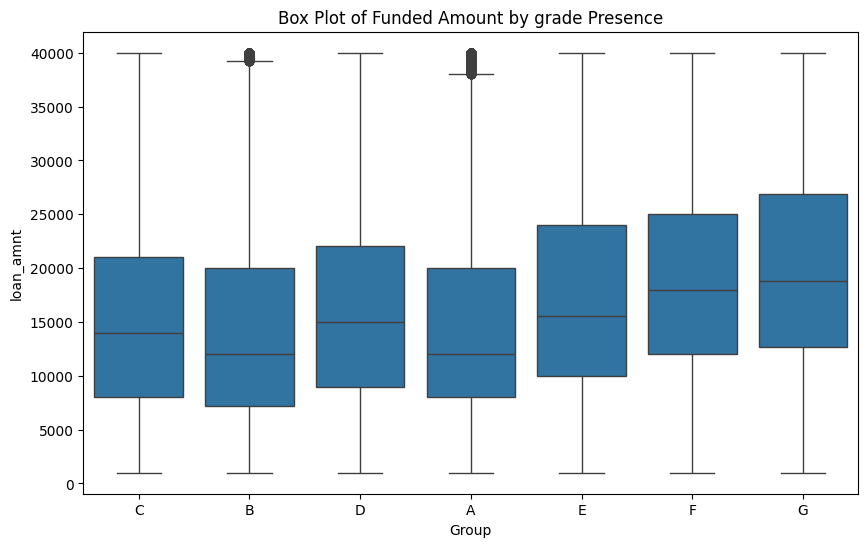

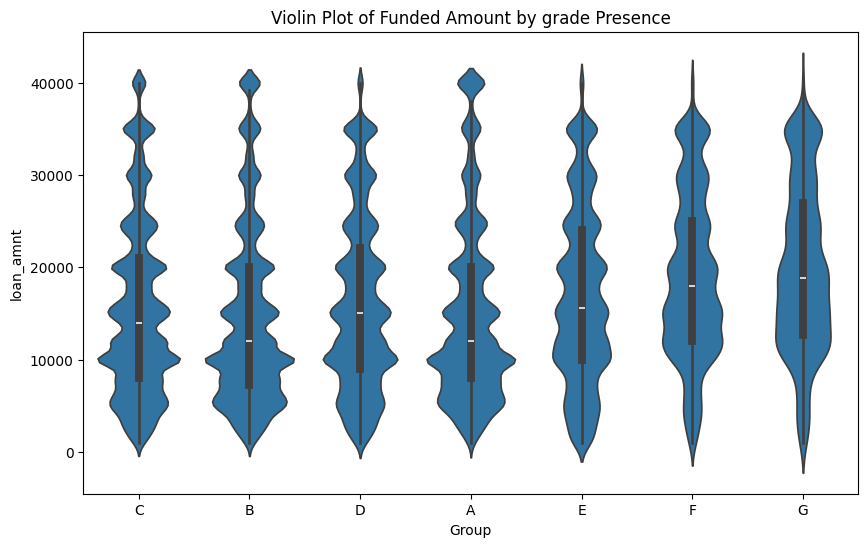

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# สมมติว่า 'target' เป็นตัวแปร categorical ที่มีค่าเป็น 'A', 'B', 'C' ฯลฯ
# คุณจะต้องกำหนดกลุ่มข้อมูลโดยใช้ตัวแปร 'target' ใน 'df_clean'
# ตัวอย่าง: การสร้าง plot_data สำหรับ 'target' แบ่งเป็นกลุ่ม A, B, C, ...

plot_data = pd.DataFrame({
    'loan_amnt': df_clean['loan_amnt'],
    'Group': df_clean[target]
})

# จากนั้นสร้าง Box Plot และ Violin Plot ตามโค้ดข้างบน


# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='loan_amnt', data=plot_data)
plt.title(f'Box Plot of Funded Amount by {target} Presence')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='loan_amnt', data=plot_data)
plt.title(f'Violin Plot of Funded Amount by {target} Presence')
plt.show()

In [15]:
df[[target,'loan_amnt']].describe()

,grade,loan_amnt
count,1432440,1432440
unique,7,1561
top,B,10000
freq,424110,129564


In [16]:
df_clean[[target,'loan_amnt']].describe()

,loan_amnt
count,1.432440e+06
mean,1.537039e+04
std,9.646026e+03
min,1.000000e+03
25%,8.000000e+03
50%,1.300000e+04
75%,2.000000e+04
max,4.000000e+04


In [17]:
df_clean.groupby(target).size()

grade
A    302988
B    424110
C    421101
D    191137
E     68353
F     19480
G      5271
dtype: int64